In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 14.8 MB/s 


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from textblob import TextBlob
import sys
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
path = '/content/drive/My Drive/Colab Notebooks/'

In [6]:
data = pd.read_csv(path+'Taliban33rb.csv')
print (data.shape)
data.head()

(33583, 4)


,waktu,id,username,teks
0,2021-09-02 15:56:22,1433458789571723264,Yoyo Suryo,"b'RT @fadlizon: Jangan ngeleslah, bilang saja ..."
1,2021-09-02 15:56:12,1433458746999590920,Mr ChainLINK,b'@SEAROSE19606266 @RepSwalwell Taliban USA'
2,2021-09-02 15:56:09,1433458733720358913,Yoyo Suryo,b'RT @TofaTofa_id: Hoi sekolam pemfitnah....si...
3,2021-09-02 15:55:56,1433458682541404164,yùki.,b'RT @Mentimoen: Taliban mengadakan parade mil...
4,2021-09-02 15:55:56,1433458680897277955,sully,"b'RT @___Mr_J03n4____: FBI, KGB, mossad,dkk be..."


In [7]:
pd.value_counts(data.waktu)

2021-08-31 07:37:33    6
2021-09-02 05:28:06    5
2021-09-02 00:23:32    5
2021-09-02 12:04:54    5
2021-09-02 10:44:49    4
                      ..
2021-09-01 14:08:24    1
2021-09-02 10:03:19    1
2021-09-02 01:08:41    1
2021-09-01 16:27:18    1
2021-09-01 18:29:54    1
Name: waktu, Length: 30609, dtype: int64

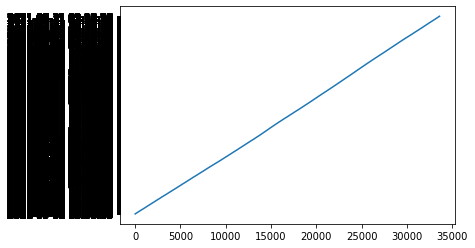

In [30]:
plt.plot(data.waktu)
plt.show()

In [8]:
fSlang = "/content/drive/My Drive/Colab Notebooks/slangwordid.txt"
bahasa = "id"
sw = open(fSlang, encoding='utf8', errors='ignore', mode='r');SlangS=sw.readlines();sw.close()
SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

In [9]:
Docs = []
df = open("/content/drive/My Drive/Colab Notebooks/stopwords.txt", 'r', encoding='utf8', errors='replace')
Docs.append(df.readlines());df.close()
stops = set([t.strip() for t in Docs[0]])
for x in ['pemerintah', 'as', 'twitter', 'b', 'kejahatan']:
  stops.add(x)

In [10]:
def formaldanstop(t):
  t = word_tokenize(t)
  for i, x in enumerate(t):
    if x in SlangS.keys():
      t[i] = SlangS[x]
  return''.join(' '.join(x for x in t if x not in stops))

In [11]:
tweets = [x for x in data['teks']]

In [12]:
tweets_preproc1 = []
for x in tweets:
  
  pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  pattern = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@8+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  #pattern2 = re.compile(r'\#').sub('', re.compile(r'RT @').sub('@', x, count=1).strip())

  x = re.sub(pattern, ' ', x)
  x = re.sub(pattern, ' ', x)
  #x = re.sub(pattern2, ' ', x)

  x = x.lower()

  #x = re.sub('((www\.[^\s]+)|(https?://)[^\s]+))','',x)
  x = re.sub(r'@[A-Za-z0-9]+', '', x) #remove mention 
  x = re.sub(r'x[A-Za-z0-9]+', '', x) #remove mention 
  x = re.sub(r'#', '', x) #remove #
  x = re.sub(r'rt[\s]+', '', x) #remove RT
  x = re.sub(r'https?:\/\/\S+', '', x) #remove link

  x = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',x)
  x = x.replace(',',' ').replace('.', ' ')

  x = re.sub('@+','',x)

  x = re.sub('[\s+]', ' ', x)
  #x = re.sub(r'#([^\s]+', r'\1', x)

  x = x.strip('\'"')
  tweets_preproc1.append(str(x))

In [13]:
tweets_preproc1

['b   jangan ngeleslah  bilang saja salah  menyusup itu infiltrasi  berkomunikasi itu         bin tak boleh gegabah bicara ke pu    ',
 'b   taliban usa ',
 'b  id  hoi sekolam pemfitnah    silahkan jawab pertanyaan pak jk ini  n n',
 'b   taliban mengadakan parade militer dengan peralatan militer modern yg peninggalan amerika  terima kasih amerika  sekarang tal    ',
 'b     mr j03n4      fbi  kgb  mossad dkk belum pernah publikasikan aksi penyusupan mereka ke negara lain n ntiba2 ada lembaga penyalur fucks    ',
 'b    the new taliban    nhubungi aja mereka2 ini ya   nuntuk membangun negara klean nada yg anggota dewan mntn wapres plus pengusaha    ',
 'b   ini asumsi paling masuk akal  bagaimana skenarionya indonesia bisa terlibat dengan kon    ',
 'b  id  hoi sekolam pemfitnah    silahkan jawab pertanyaan pak jk ini  n n',
 'b keknya harun masiku sedang mematai matai taliban   ',
 'b  intelegent  dengan iq 200 kolektif      n nakui menyusup ke taliban  muslim arbi  bin terlihat bodo

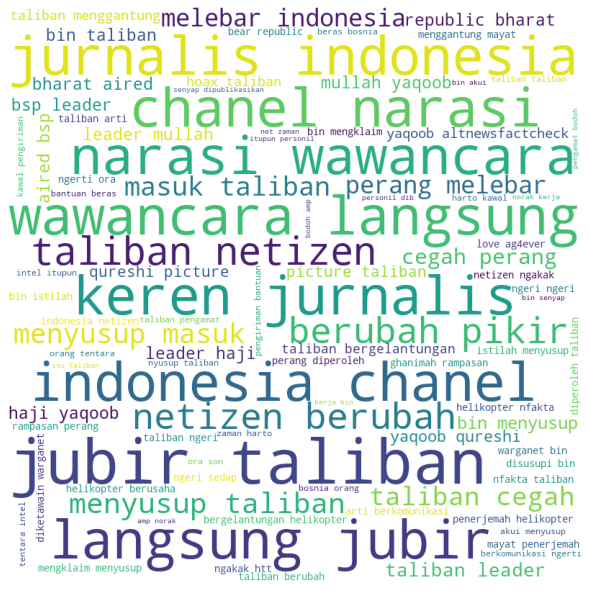

In [14]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(stops)

for val in tweets_preproc1:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += ' '.join(tokens)+' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

In [15]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

clean_tweets = []

for i, kalimat in enumerate(tweets_preproc1):
  stop = stopword.remove(kalimat)
  stem = stemmer.stem(stop)

  print('loading kalimat ke:', i+1,'dari', len(tweets_preproc1))
  clean_tweets.append(stem)

Streaming output truncated to the last 5000 lines.
loading kalimat ke: 28584 dari 33583
loading kalimat ke: 28585 dari 33583
loading kalimat ke: 28586 dari 33583
loading kalimat ke: 28587 dari 33583
loading kalimat ke: 28588 dari 33583
loading kalimat ke: 28589 dari 33583
loading kalimat ke: 28590 dari 33583
loading kalimat ke: 28591 dari 33583
loading kalimat ke: 28592 dari 33583
loading kalimat ke: 28593 dari 33583
loading kalimat ke: 28594 dari 33583
loading kalimat ke: 28595 dari 33583
loading kalimat ke: 28596 dari 33583
loading kalimat ke: 28597 dari 33583
loading kalimat ke: 28598 dari 33583
loading kalimat ke: 28599 dari 33583
loading kalimat ke: 28600 dari 33583
loading kalimat ke: 28601 dari 33583
loading kalimat ke: 28602 dari 33583
loading kalimat ke: 28603 dari 33583
loading kalimat ke: 28604 dari 33583
loading kalimat ke: 28605 dari 33583
loading kalimat ke: 28606 dari 33583
loading kalimat ke: 28607 dari 33583
loading kalimat ke: 28608 dari 33583
loading kalimat ke: 2860

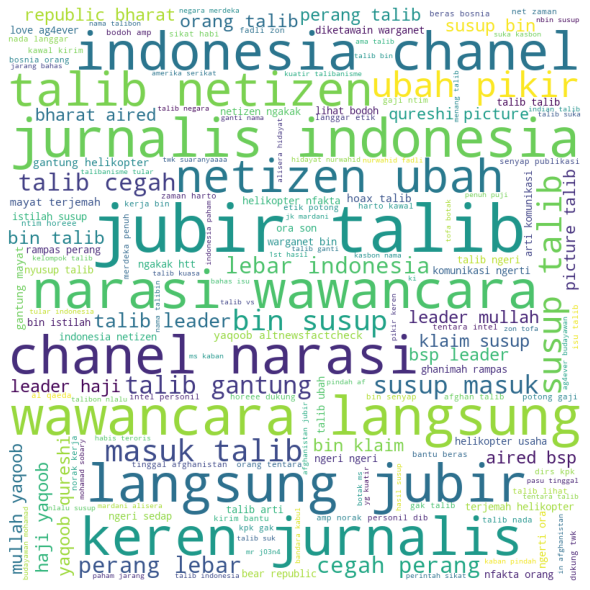

In [16]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(stops)

for val in clean_tweets:

  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += ' '.join(tokens)+' '
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

In [17]:
hasil = pd.DataFrame(clean_tweets, columns=['Text Bersih'])
hasil.to_csv(path+'Taliban_bersih.csv', index=False)

In [18]:
text_baru = pd.read_csv(path+'Taliban_bersih.csv')
print(text_baru.shape)
text_baru.head()

(33583, 1)


,Text Bersih
0,b jangan ngeleslah bilang salah susup infiltra...
1,b talib usa
2,b id hoi kolam fitnah silah jawab tanya pak jk...
3,b talib ada parade militer alat militer modern...
4,b mr j03n4 fbi kgb mossad dkk pernah publikasi...


In [19]:
text_baru.isnull().sum()

Text Bersih    0
dtype: int64

In [20]:
data_fix = text_baru.dropna()
print(data_fix.shape)
data_fix.head()

(33583, 1)


,Text Bersih
0,b jangan ngeleslah bilang salah susup infiltra...
1,b talib usa
2,b id hoi kolam fitnah silah jawab tanya pak jk...
3,b talib ada parade militer alat militer modern...
4,b mr j03n4 fbi kgb mossad dkk pernah publikasi...


In [21]:
data_fix.isnull().sum()

Text Bersih    0
dtype: int64

In [22]:
 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.feature_extraction.text import TfidfTransformer

 vectorizer = CountVectorizer()
 tf_transformer = TfidfTransformer()

 datavector = vectorizer.fit_transform(data_fix['Text Bersih'])
 datatfidf = tf_transformer.fit_transform(datavector)
 datavector.shape

(33583, 19362)

In [23]:
df = pd.DataFrame(clean_tweets, columns=['Text Bersih'])
df.head()

,Text Bersih
0,b jangan ngeleslah bilang salah susup infiltra...
1,b talib usa
2,b id hoi kolam fitnah silah jawab tanya pak jk...
3,b talib ada parade militer alat militer modern...
4,b mr j03n4 fbi kgb mossad dkk pernah publikasi...


In [24]:
def getSubject(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df['Subjectivity'] = df['Text Bersih'].apply(getSubject)
df['Polarity'] =  df['Text Bersih'].apply(getPolarity)

df

,Text Bersih,Subjectivity,Polarity
0,b jangan ngeleslah bilang salah susup infiltra...,0.000000,0.000
1,b talib usa,0.000000,0.000
2,b id hoi kolam fitnah silah jawab tanya pak jk...,0.000000,0.000
3,b talib ada parade militer alat militer modern...,0.266667,-0.025
4,b mr j03n4 fbi kgb mossad dkk pernah publikasi...,0.000000,0.000
...,...,...,...
33578,b tumhe ak muslim k sath atyachar ho jay to de...,0.000000,0.000
33579,b baru keren jurnalis indonesia chanel narasi ...,0.000000,0.000
33580,b as resmi hengkang talib deklarasi afghanista...,0.000000,0.000
33581,b kholidi talib siap ambil alih bandara kabul ...,0.000000,0.000


In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

In [26]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ') '+sortedDF['Text Bersih'][i])
    j=j+1


1) b the new talib nhubungi aja mereka2 ya nuntuk bangun negara klean nada yg anggota dewan mntn wapres plus usaha
2) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
3) b hahaha haha fix perintah kroco takut lambung terus dukung talib susah molor kayak isu
4) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
5) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
6) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
7) b garudahitam hahaha talib teman sama komunis puja puja sini micek masuk si
8) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
9) b ada yg meng edukasi positive rakyat issue talib justru angkat takut nakuti beri stigma
10) b world facing huge challenges from n1 al shabab n2 al murabitun africa n3 al qaeda afghanistan n4 al qaeda islamic m
11) b bin y jauh bgt main talib negeri se

In [27]:
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ') '+sortedDF['Text Bersih'][i])
    j=j+1


1) b talib ada parade militer alat militer modern yg tinggal amerika terima kasih amerika sekarang tal
2) b ibu ri segera kirim jk id afghanistan tenaga mere
3) b ibu ri segera kirim jk id afghanistan tenaga mere
4) b aap jaise hi logoon ne india system ko destroy kr dya hai i follow teachings of islam
5) b kholidi as kirim truk burger king afghanistan tahun 2014 talib harus serta truk dalam parade http
6) b 5unyi parade menang talib atas amerika serikat langsung kandahar
7) b ibu ri segera kirim jk id afghanistan tenaga mere
8) b barbarian human talib
9) b as kirim truk burger king afghanistan tahun 2014 talib harus serta truk dalam parade
10) b ibu ri segera kirim jk id afghanistan tenaga mere
11) b cia nya amerika serikat svr nya rusia insecure yg ngaku ngaku laku susup talib
12) b laku parade talib pamer senjata tinggal amerika serikat
13) b edar rekam video viral lihat sorang duga gantung olah talib helikopter black h
14) b ibu ri segera kirim jk id afghanistan tenaga mere
15) b c

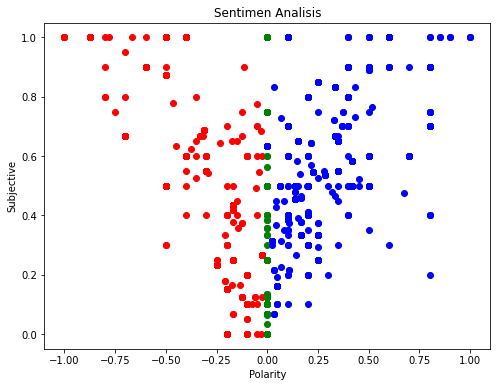

In [28]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):  
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  elif (sortedDF['Analysis'][i] == 'Neutral'):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
  else:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
plt.title('Sentimen Analisis')
plt.xlabel('Polarity')
plt.ylabel('Subjective')
plt.show()

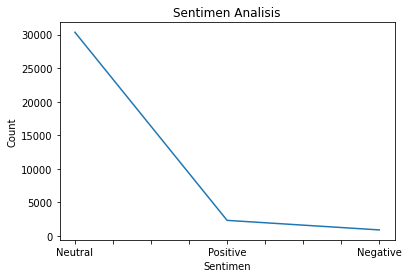

In [29]:
df['Analysis'].value_counts()

plt.title('Sentimen Analisis')
plt.xlabel('Sentimen')
plt.ylabel('Count')

df['Analysis'].value_counts().plot(kind='line')
plt.show()

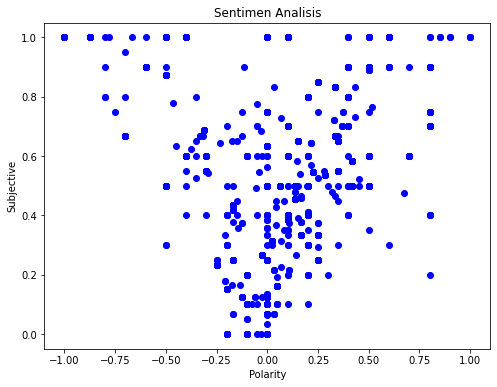

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentimen Analisis')
plt.xlabel('Polarity')
plt.ylabel('Subjective')
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text Bersih']
round((ptweets.shape[0] / df.shape[0])*100, 1) 

6.9

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text Bersih']
round((ntweets.shape[0] / df.shape[0])*100, 1) 

2.7

In [ ]:
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Text Bersih']
round((ntweets.shape[0] / df.shape[0])*100, 1) 

90.4

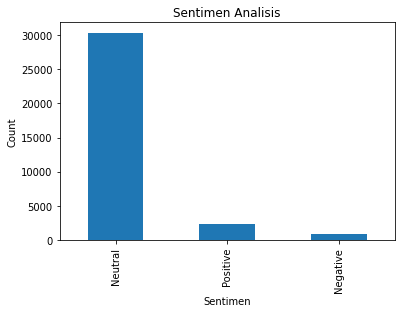

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentimen Analisis')
plt.xlabel('Sentimen')
plt.ylabel('Count')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()
